In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [5]:
def load_data():
    df = pd.read_csv("Concrete_Data.csv")
    return df

df = load_data()
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
len(df)

1030

In [4]:
def split_X_y(df):
    X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
    y = df['Concrete compressive strength(MPa, megapascals) ']
    return X, y

X, y = split_X_y(df)

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# kfではindexの番号が戻り値になる
for train_index, val_index in kf.split(X):
    break

In [7]:
train_index

array([   0,    1,    4,    5,    6,    7,    8,    9,   11,   12,   13,
         14,   15,   16,   17,   18,   19,   20,   21,   22,   24,   26,
         27,   28,   29,   32,   33,   34,   35,   36,   37,   38,   40,
         41,   42,   43,   45,   46,   47,   48,   49,   50,   51,   52,
         53,   56,   57,   58,   61,   62,   64,   65,   68,   69,   71,
         73,   74,   75,   77,   78,   79,   80,   81,   82,   83,   84,
         85,   87,   89,   90,   91,   93,   94,   95,   97,   98,   99,
        102,  103,  104,  105,  108,  111,  112,  113,  114,  115,  116,
        117,  118,  119,  121,  122,  123,  124,  125,  126,  127,  128,
        129,  130,  131,  132,  133,  134,  135,  137,  138,  140,  141,
        142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,
        153,  154,  155,  156,  157,  159,  160,  161,  162,  163,  164,
        165,  166,  167,  169,  170,  171,  172,  173,  175,  176,  177,
        178,  179,  180,  181,  182,  183,  185,  1

In [8]:
X.loc[train_index]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
...,...,...,...,...,...,...,...,...
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28


In [9]:
def calc_accuracy(df, train_index, val_index):
    # インスタンスの作成
    reg = RandomForestRegressor()

    # trainとvalに分ける
    df_train = df.loc[train_index]
    df_val = df.loc[val_index]

    # trainとvalについて説明変数と目的変数に分ける
    X_train, y_train = split_X_y(df_train)
    X_val, y_val = split_X_y(df_val)

    # 学習させる
    reg.fit(X_train, y_train)

    #　予測させる
    y_pred = reg.predict(X_val)

    # モデルの評価
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return reg, r2, rmse

In [10]:
list_model = []
list_r2 = []
list_rmse = []

for train_index, val_index in kf.split(df):
    reg, r2, rmse = calc_accuracy(df, train_index, val_index)
    list_model.append(reg)
    list_r2.append(r2)
    list_rmse.append(rmse)

In [11]:
print("Average r2:", np.average(list_r2))
print("Average rmse:", np.average(list_rmse))

Average r2: 0.9071873056573404
Average rmse: 5.06579663417824


(0.0, 1.0)

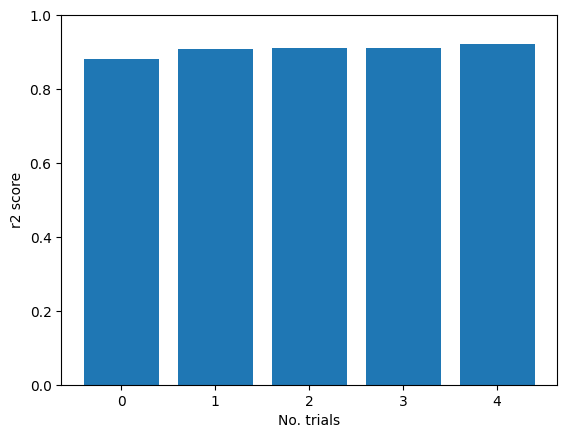

In [12]:
plt.bar(np.arange(len(list_r2)), list_r2)
plt.xlabel("No. trials")
plt.ylabel("r2 score")
plt.ylim(0,1)

Text(0, 0.5, 'RMSE')

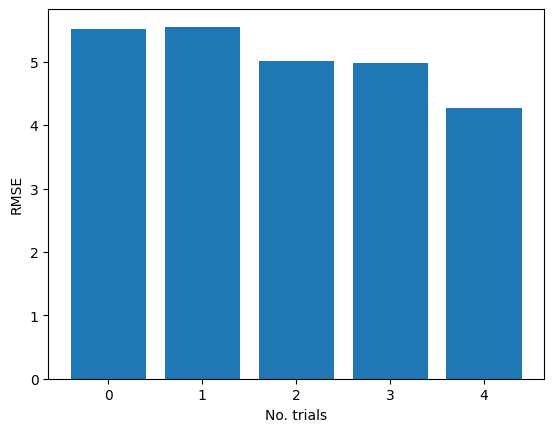

In [13]:
plt.bar(np.arange(len(list_rmse)), list_rmse)
plt.xlabel("No. trials")
plt.ylabel("RMSE")